In [4]:
import cartopy 
import glob
import matplotlib.pyplot as plt
import os
import xarray as xr
import xgcm 
from fastjmd95 import jmd95numba 
import numpy as np


BASE = '/scratch/ab10313/pleiades/'

In [7]:
input_features_for_plot = [r'$\overline{\nabla b}^z$', '$f$','$H_{ML}$',r'$\tau$', '$Q^*$','$H_{BL}$',
                 '$\overline{\delta}^z$', '$\overline{\zeta}^z$', '$\overline{\sigma}^z$' ]


In [9]:
input_features = ['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain']
path= '/scratch/ab10313/pleiades/NN_data_1_4/'

# load features for input
in_features=[]
for input_feature in input_features:
    in_features.append(np.load(path+'%s.npy' % input_feature))
# x input
x_input = np.stack(in_features,axis=1)

# load mean and std from features for input
std_in_features=[]
mean_in_features=[]
for input_feature in input_features:
    mean_in_features.append(np.load(path+'%s_mean.npy' % input_feature)*np.ones((x_input.shape[0],x_input.shape[2],x_input.shape[3])))
    std_in_features.append(np.load(path+'%s_std.npy' % input_feature)*np.ones((x_input.shape[0],x_input.shape[2],x_input.shape[3])))

x_mean = np.stack(mean_in_features,axis=1)
x_std = np.stack(std_in_features,axis=1)


x_norm = (x_input - x_mean)/x_std

In [10]:
# load output
path= '/scratch/ab10313/pleiades/NN_data_1_4/'
WB_sg = np.load(path+'WB_sg.npy')
y = np.tile(WB_sg,(1,1,1,1)).reshape(WB_sg.shape[0],1,WB_sg.shape[1],WB_sg.shape[2])

y_mean = np.load(path+'WB_sg_mean.npy')*np.ones(y.shape)
y_std = np.load(path+'WB_sg_std.npy')*np.ones(y.shape)
y_norm = (y - y_mean)/y_std

## plot of normalized inputs

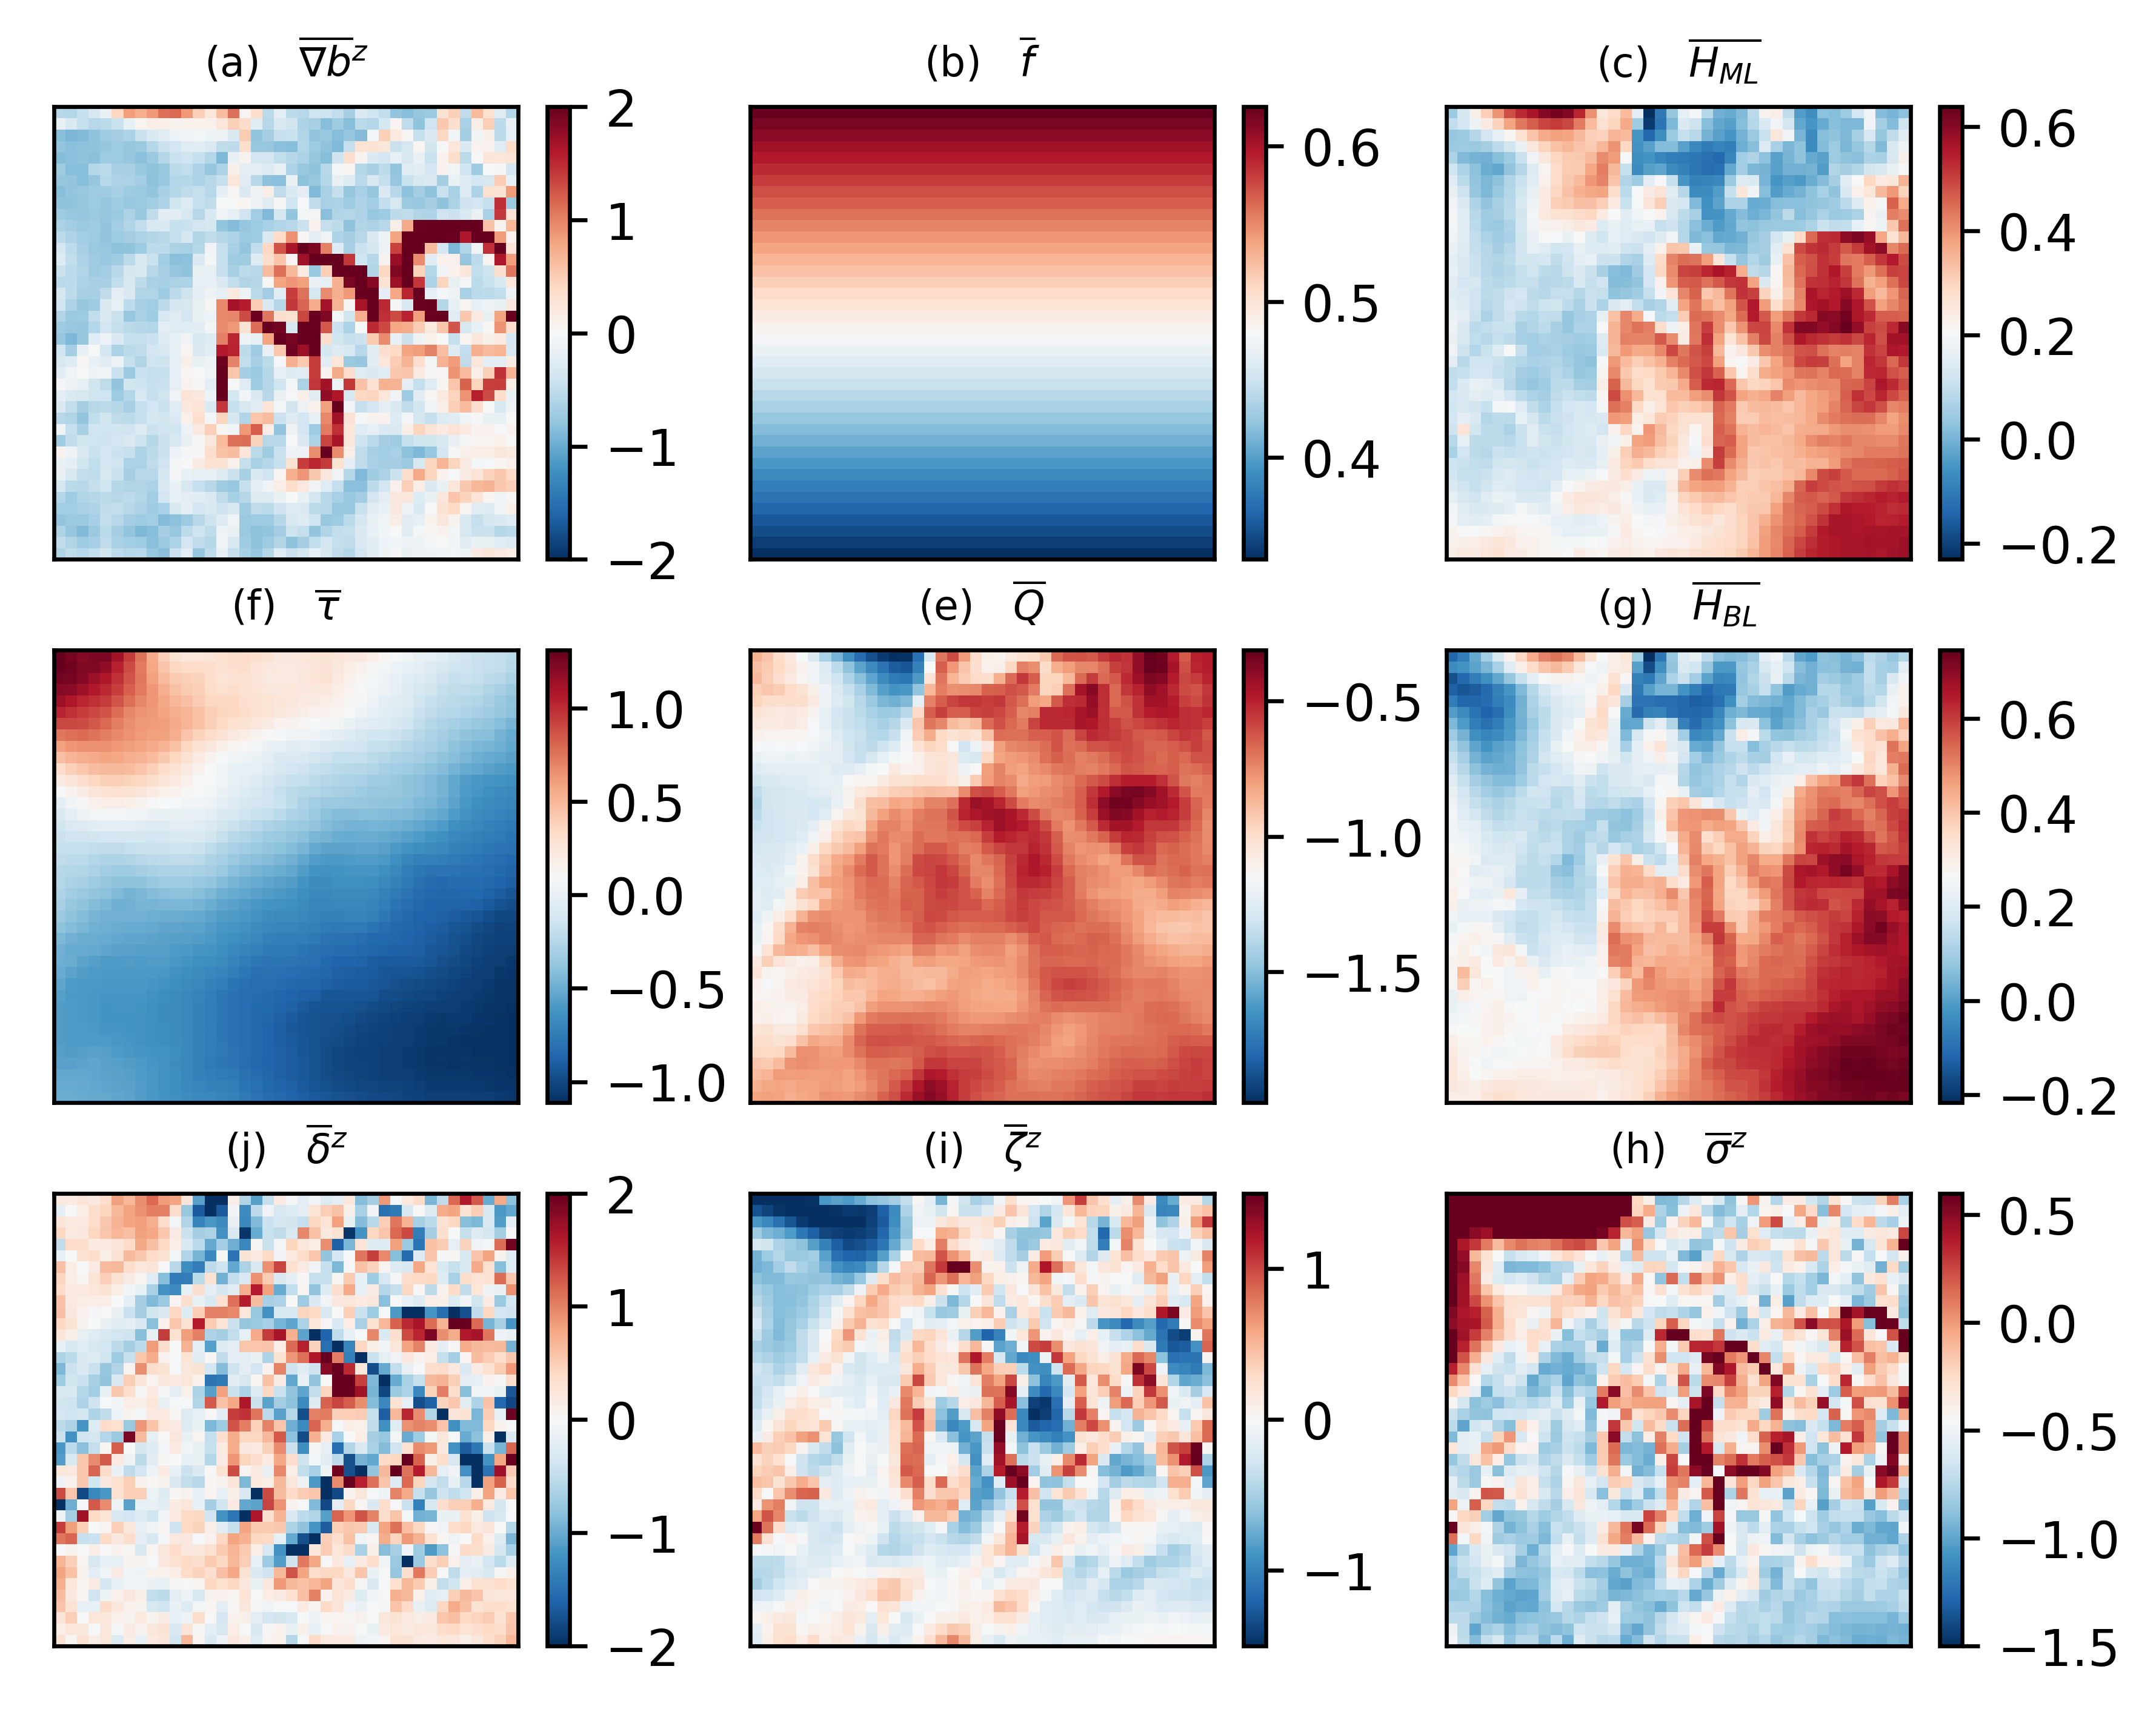

In [11]:
plt.subplots(nrows=2, ncols=5, figsize=(7, 5.5), dpi=600)
#plt.rcParams.update({'font.size': 8})
plt.subplot(122)
it =0
    

plt.subplot(331)
plt.pcolor(x_norm[it,0,:,:],vmin=-2,vmax=2, cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(a)   '+ r'$\overline{\nabla b}^z$',fontsize=8)

plt.subplot(332)
plt.pcolor(x_norm[it,1,:,:],  cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(b)   $\overline{f}$',fontsize=8)

plt.subplot(333)
plt.pcolor(x_norm[it,2,:,:],  cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(c)   '+r'$\overline{H_{ML}}$',fontsize=8)


plt.subplot(334)
plt.pcolor(x_norm[it,3,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(f)   '+r'$\overline{\tau}$',fontsize=8)

plt.subplot(335)
plt.pcolor(x_norm[it,4,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(e)   '+r'$\overline{Q}$',fontsize=8)

plt.subplot(336)
plt.pcolor(-x_norm[it,5,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(g)   '+'$\overline{H_{BL}}$',fontsize=8)

plt.subplot(337)
plt.pcolor(x_norm[it,6,:,:],vmin=-2,vmax=2,  cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(j)   '+'$\overline{\delta}^z$',fontsize=8)

plt.subplot(338)
plt.pcolor(x_norm[it,7,:,:], vmin=-1.5,vmax=1.5, cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(i)   '+'$\overline{\zeta}^z$',fontsize=8)

plt.subplot(3,3,9)
plt.pcolor(x_norm[it,8,:,:],vmin=-1.5,vmax=.6,  cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(h)   '+'$\overline{\sigma}^z$',fontsize=8)

#plt.subplot(3,4,12)
#plt.pcolor(Y_output_gulf[it,0,:,:], cmap='RdBu_r')
##plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.colorbar()
#plt.xticks([])
#plt.yticks([])
#plt.title('(k)   '+r'$\overline{w^\prime b^\prime}^z$',fontsize=34)

#[FCOR, grad_B, HML, Nsquared, TAU, Q, HBL, div, vort, strain]
plt.rcParams.update({'font.size': 8})
plt.savefig('./figures/inputs_normalized.png')

## plot of inputs in physical space 

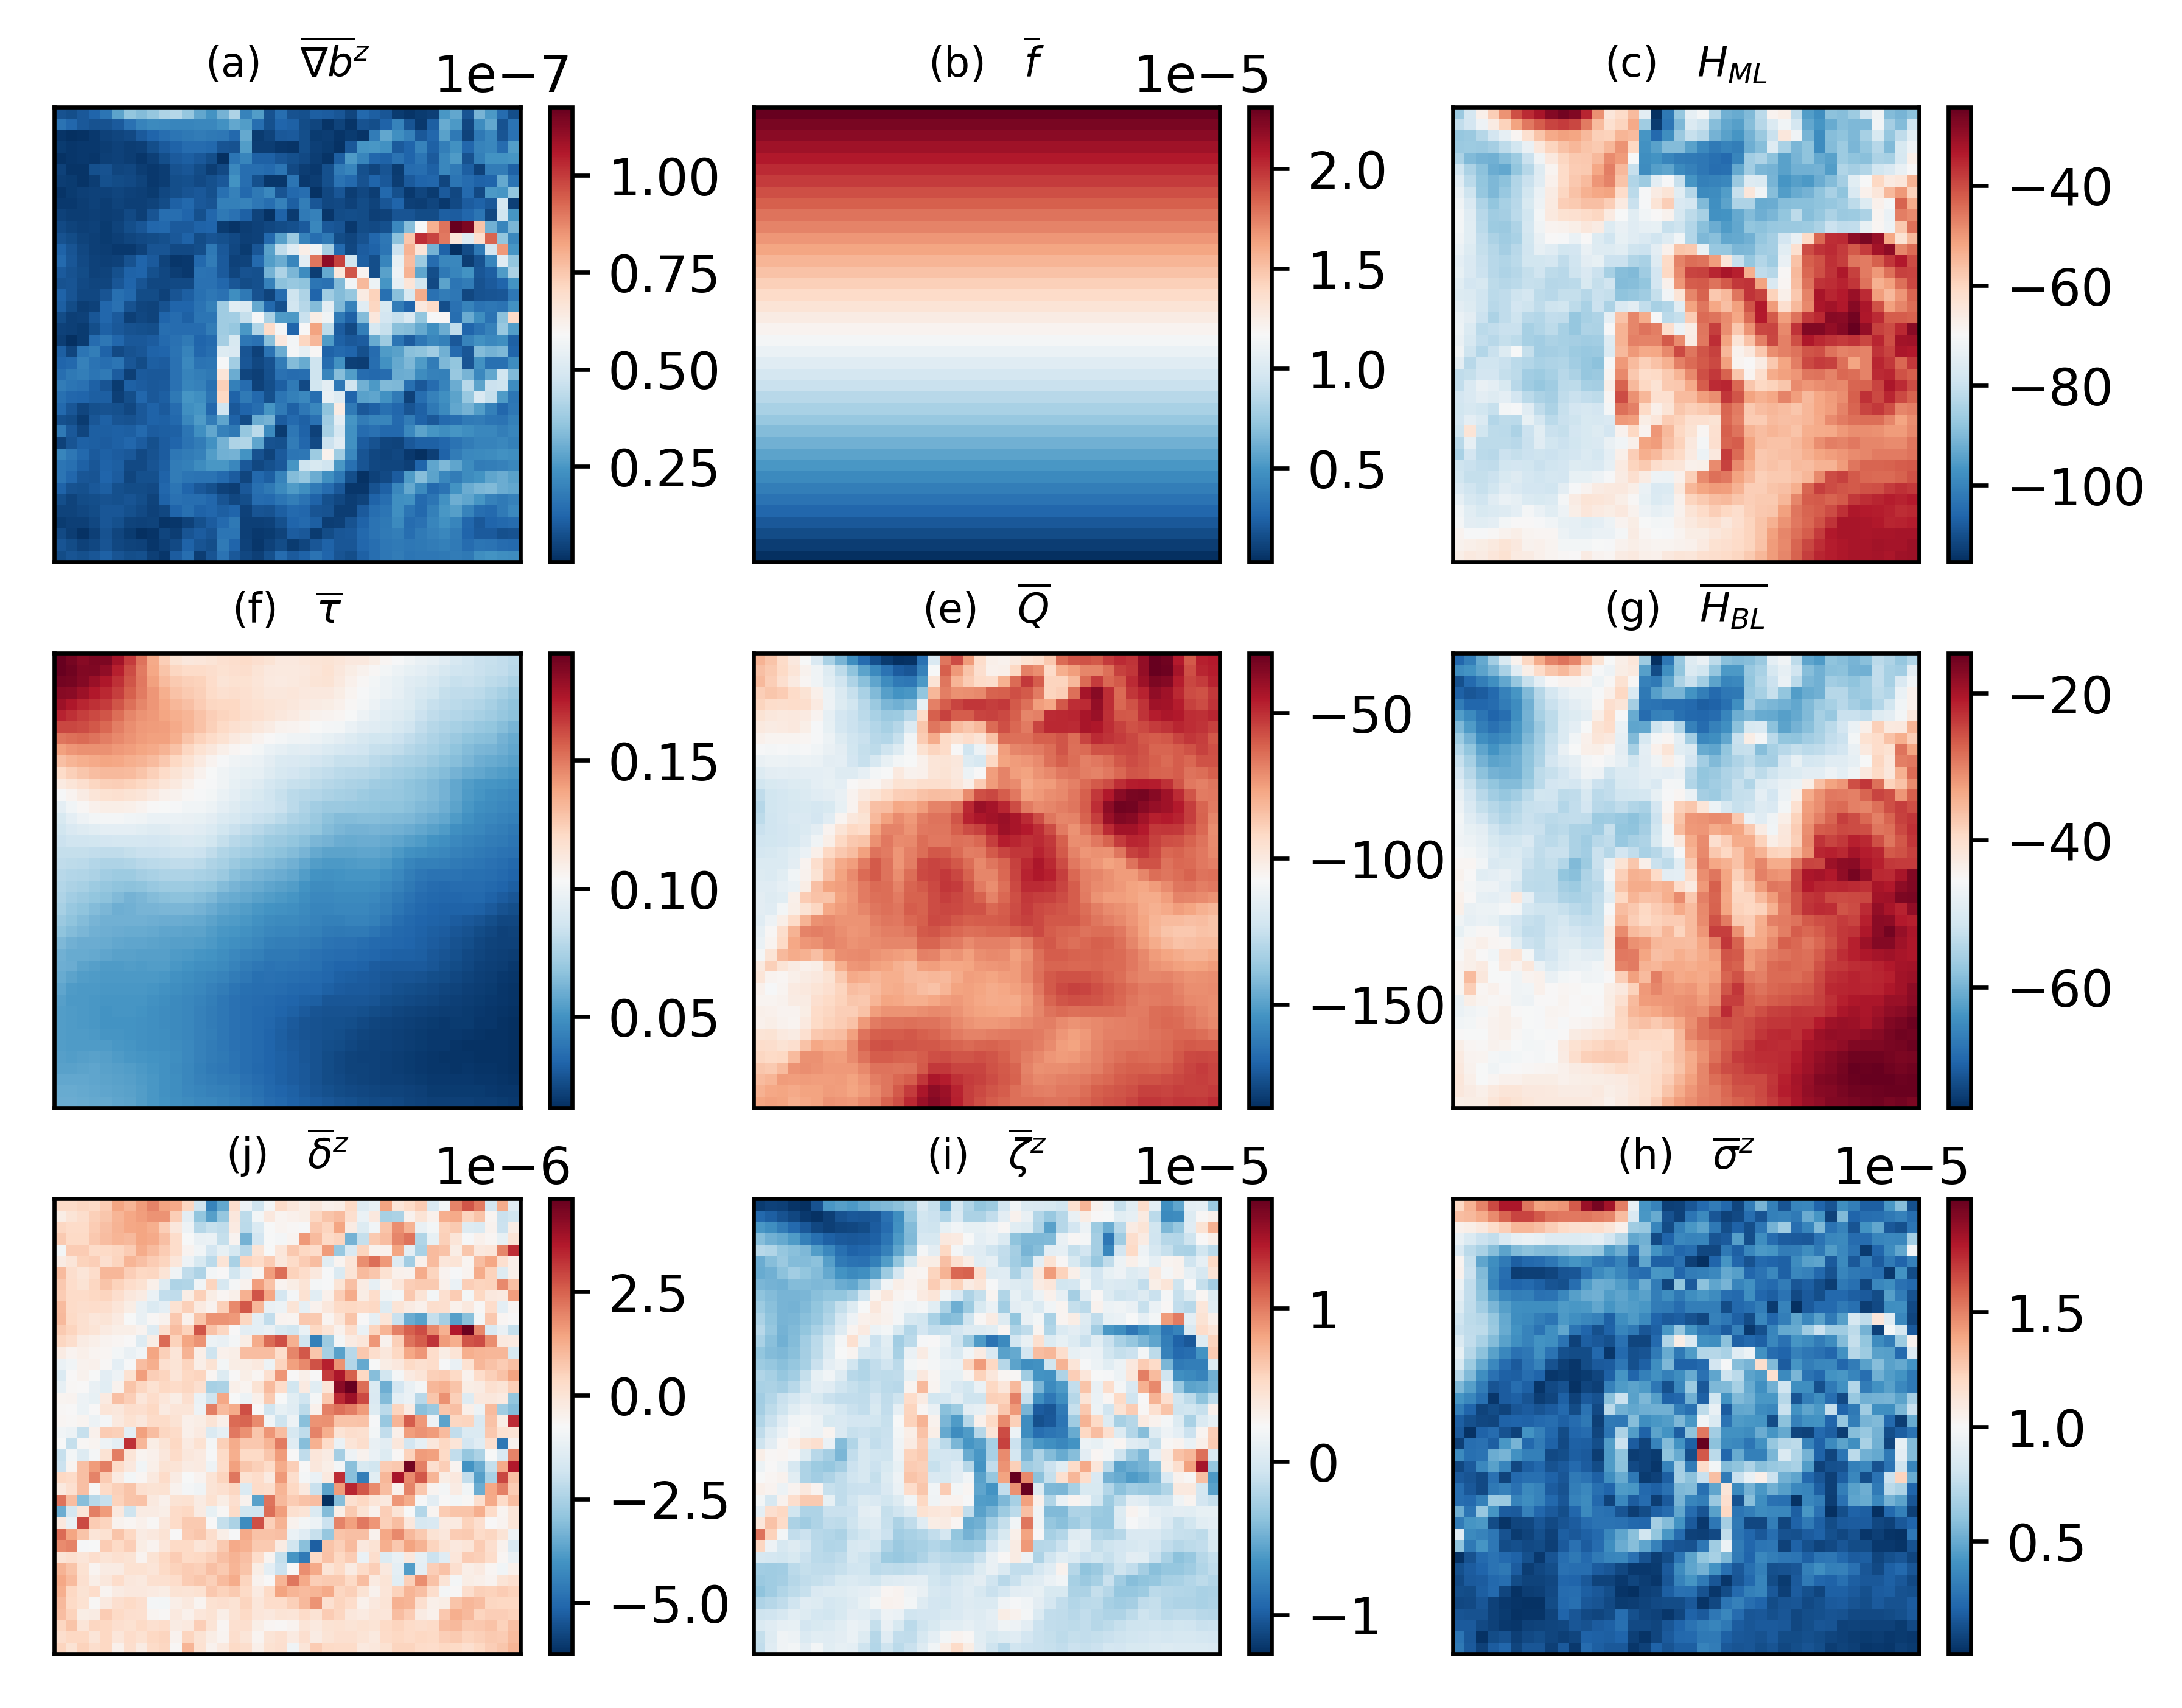

In [6]:
plt.subplots(nrows=2, ncols=5, figsize=(7, 5.5), dpi=600)
#plt.rcParams.update({'font.size': 8})
plt.subplot(122)
it =0
    

plt.subplot(331)
plt.pcolor(x_input[it,0,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(a)   '+ r'$\overline{\nabla b}^z$',fontsize=8)

plt.subplot(332)
plt.pcolor(x_input[it,1,:,:],  cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(b)   $\overline{f}$',fontsize=8)

plt.subplot(333)
plt.pcolor(x_input[it,2,:,:],  cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(c)   '+r'$H_{ML}$',fontsize=8)


plt.subplot(334)
plt.pcolor(x_input[it,3,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(f)   '+r'$\overline{\tau}$',fontsize=8)

plt.subplot(335)
plt.pcolor(x_input[it,4,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(e)   '+r'$\overline{Q}$',fontsize=8)

plt.subplot(336)
plt.pcolor(-x_input[it,5,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(g)   '+'$\overline{H_{BL}}$',fontsize=8)

plt.subplot(337)
plt.pcolor(x_input[it,6,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(j)   '+'$\overline{\delta}^z$',fontsize=8)

plt.subplot(338)
plt.pcolor(x_input[it,7,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(i)   '+'$\overline{\zeta}^z$',fontsize=8)

plt.subplot(3,3,9)
plt.pcolor(x_input[it,8,:,:], cmap='RdBu_r')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title('(h)   '+'$\overline{\sigma}^z$',fontsize=8)


#[FCOR, grad_B, HML, Nsquared, TAU, Q, HBL, div, vort, strain]
plt.rcParams.update({'font.size': 8})
plt.savefig('./figures/inputs_physical_space.png')